## REFL Assignment 1
Vinodh Chincholi, MDS202252

Question 2(ii) Cross Entropy Method for 687 gridworld problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos, pi, exp, dot

In [2]:
g = 9.8
mp = 0.1
mc = 10.0
l = 1.0

def sigmoid(par, vec):
    return 1 /(1 + exp(-1*dot(par, vec)))

In [3]:
def validate(val, type):
    if type == 'x_dot':
        if val <= -10:
            return -10
        elif val >= 10:
            return 10
        else:
            return val
        
    elif type == 'theta_dot':
        if val <= -1*pi:
            return -1*pi
        elif val >= pi:
            return pi
        else:
            return val

In [4]:
class cartpole:
    
    def __init__(self):
        
        self.x = 0
        self.x_dot = 0
        self.theta = 0
        self.theta_dot = 0
        self.t = 0
        
    def getCurState(self):
        return np.array([self.x, self.x_dot, self.theta, self.theta_dot, self.t])
    
    def getNewState(self, F):
        
        x, x_dot, theta, theta_dot, t = self.x, self.x_dot, self.theta, self.theta_dot, self.t
        
        expr1 = (-1*F - mp*l*(theta_dot**2)*sin(theta))
        theta_doubledot = (g*sin(theta) + cos(theta)*expr1)/(l*(4/3 - mp*(cos(theta)**2)/(mc + mp)))
        
        x_doubledot = (F + mp*l*((theta_dot**2)*sin(theta) - theta_doubledot*cos(theta)))/(mc+mp)
        
        self.theta_dot = validate(theta_dot + 0.02*theta_doubledot, 'theta_dot')
        self.x_dot = validate(x_dot + 0.02*x_doubledot, 'x_dot')
        
        self.theta = self.theta + 0.02*self.theta_dot
        self.x = x + 0.02*self.x_dot
        self.t = t + 0.02
        
        return
    
    def getAction(self, par):
        prob_right = sigmoid(par, self.getCurState())
        
        if prob_right > 0.5:
            return 10
        else:
            return -10

        
    def legal(self):
        if self.x <= -3 or self.x >= 3:
            return False
        
        elif self.theta <= -5*pi/12 or self.theta >= 5*pi/12:
            return False
        
        elif self.t >= 20:
            return False
        
        return True

In [5]:
cart = cartpole()
print(cart.getCurState())
cart.getNewState(10.0)
print(cart.getCurState())

cart.legal()

[0 0 0 0 0]
[ 0.00042596  0.02129824 -0.00302244 -0.15112219  0.02      ]


True

In [6]:
def eval_policy(par):

    cart = cartpole()
    reward = 0
    while cart.legal():
        f = cart.getAction(par = par)
        cart.getNewState(f)
        reward = reward + 1

    return (reward)

### Upto now using code from part (i)

In [7]:
## taken random eps, K and K_eps
eps = 0.2
K = 100
K_eps = 20

## The initial parameter is picked randomly
param_mean = np.random.normal(0, 1, (5))
covar = 2*np.eye(5, 5)

In [8]:
mean_list = [param_mean]
covar_list = [covar]
gain_list = []

In [9]:
for i in range(10):
    
    ## Sample 100 policies from Normal(theta0, covar = 2*Identity)
    param_k = [np.random.multivariate_normal(param_mean, covar) for k in range(K)]
    
    ## Evaluate all 100 of them
    gain_list = [eval_policy(tk) for tk in param_k]
    
    ## Get 10 20 performing policies
    top_indices = np.argsort(gain_list)
    top_indices = top_indices[-1:-21:-1]
    top_param = [param_k[i] for i in top_indices]
    
    ## The new mean is the mean of these top policies
    param_mean = np.mean(top_param, axis=0)
    
    ## Update covar like shown in question
    term = np.zeros_like(covar)
    for k in range(K_eps):
        dev = top_param[k] - param_mean
        term = term + np.outer(dev, dev)
        
    covar = (eps*covar + term)/(eps + K_eps)
    
    
    ## Collect updates to check convergence
    mean_list.append(param_mean)
    covar_list.append(covar)
    gain_list.append(np.max(gain_list))

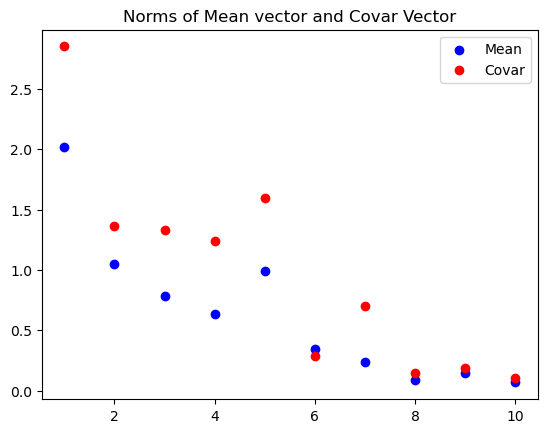

In [26]:
mean_norm_list = []
covar_norm_list = []
for i in range(len(mean_list)-1):
    mean_norm_list.append(np.linalg.norm(mean_list[i]-mean_list[i+1]))
    covar_norm_list.append(np.linalg.norm(covar_list[i]-covar_list[i+1]))

plt.title('Norms of Mean vector and Covar Vector')
plt.scatter([j+1 for j in range(len(mean_norm_list))], mean_norm_list, c='blue')
plt.scatter([j+1 for j in range(len(covar_norm_list))], covar_norm_list, c='red')
plt.legend(['Mean', 'Covar'])
plt.show()

Both the mean and the covariance has converged

In [11]:
## The final mean policy performs best, giving reward 1001 as desired
eval_policy(param_mean)

1001